In [223]:
#import all necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix,classification_report, roc_curve, auc,confusion_matrix

In [322]:
#load the datset
df = pd.read_csv('fraud.csv', chunksize=1900000)

In [324]:
for chunks in df:
    print(chunks.shape)

(1900000, 11)
(1900000, 11)
(1900000, 11)
(662620, 11)


In [325]:
df = chunks

In [326]:
#see sample of the dataset
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6314978,687,CASH_OUT,70302.56,C1999493761,0.00,0.00,C1016706162,3004023.20,3074325.76,0,0
5717561,398,CASH_OUT,216816.28,C795766743,0.00,0.00,C521882515,1411745.85,1628562.13,0,0
5834631,402,CASH_OUT,52013.04,C671421202,41788.00,0.00,C1355619309,0.00,52013.04,0,0
5866163,403,CASH_IN,120518.67,C347825290,8544304.81,8664823.48,C1620168250,151405.84,30887.17,0,0
6185755,567,CASH_OUT,212174.83,C289316372,0.00,0.00,C1694062659,1695519.37,1907694.19,0,0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662620 entries, 5700000 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            662620 non-null  int64  
 1   type            662620 non-null  object 
 2   amount          662620 non-null  float64
 3   nameOrig        662620 non-null  object 
 4   oldbalanceOrg   662620 non-null  float64
 5   newbalanceOrig  662620 non-null  float64
 6   nameDest        662620 non-null  object 
 7   oldbalanceDest  662620 non-null  float64
 8   newbalanceDest  662620 non-null  float64
 9   isFraud         662620 non-null  int64  
 10  isFlaggedFraud  662620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 55.6+ MB


In [328]:
df.duplicated().value_counts()

False    662620
dtype: int64

In [329]:
#see statistical measures
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,662620.000000,6.626200e+05,6.626200e+05,6.626200e+05,6.626200e+05,6.626200e+05,662620.000000,662620.000000
mean,496.740452,1.680283e+05,7.537256e+05,7.689377e+05,1.196791e+06,1.288611e+06,0.005717,0.000018
std,101.902434,4.109657e+05,2.552330e+06,2.578379e+06,4.109849e+06,4.175612e+06,0.075392,0.004256
min,398.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,403.000000,1.305841e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,474.000000,7.065667e+04,1.593800e+04,0.000000e+00,1.075769e+05,1.854002e+05,0.000000,0.000000
75%,573.000000,2.012567e+05,1.076580e+05,1.410075e+05,9.073872e+05,1.045937e+06,0.000000,0.000000
max,743.000000,1.541594e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000,1.000000


In [330]:
df.describe(include=object)

,type,nameOrig,nameDest
count,662620,662620,662620
unique,5,662520,534705
top,PAYMENT,C515118379,C229021471
freq,229253,2,8


In [331]:
#check null values in dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [332]:
#check unique values
df.nunique()

step                 346
type                   5
amount            645631
nameOrig          662520
oldbalanceOrg     266819
newbalanceOrig    292341
nameDest          534705
oldbalanceDest    370358
newbalanceDest    397176
isFraud                2
isFlaggedFraud         2
dtype: int64

PAYMENT     229253
CASH_OUT    221626
CASH_IN     147763
TRANSFER     59171
DEBIT         4807
Name: type, dtype: int64


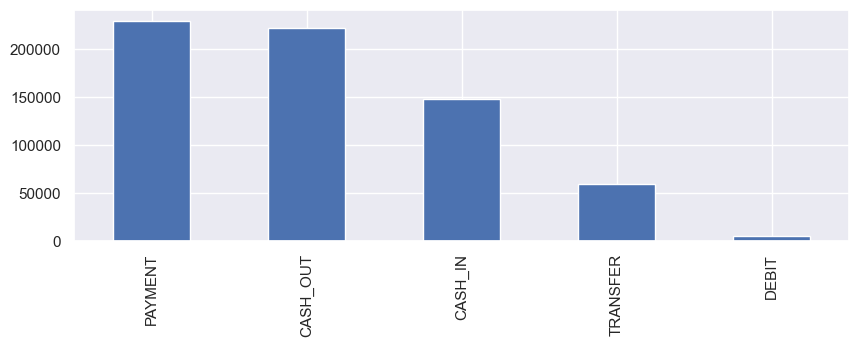

In [333]:
sns.set(rc={'figure.figsize':(10,3)})
df.type.value_counts().plot(kind='bar')
print(df.type.value_counts())

In [335]:
#check correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.010414,-0.039446,-0.041383,-0.007223,-0.007115,0.054679,0.005262
amount,0.010414,1.000000,0.057252,0.012335,0.144413,0.223091,0.256199,0.055265
oldbalanceOrg,-0.039446,0.057252,1.000000,0.995378,0.067677,0.052273,0.032013,0.014494
newbalanceOrig,-0.041383,0.012335,0.995378,1.000000,0.070311,0.051448,-0.014022,0.014323
oldbalanceDest,-0.007223,0.144413,0.067677,0.070311,1.000000,0.995306,-0.010591,-0.001239
newbalanceDest,-0.007115,0.223091,0.052273,0.051448,0.995306,1.000000,0.001883,-0.001313
isFraud,0.054679,0.256199,0.032013,-0.014022,-0.010591,0.001883,1.000000,0.056123
isFlaggedFraud,0.005262,0.055265,0.014494,0.014323,-0.001239,-0.001313,0.056123,1.000000


step                0.608996
amount             12.026515
oldbalanceOrg       5.546091
newbalanceOrig      5.434244
oldbalanceDest     18.505433
newbalanceDest     17.868051
isFraud            13.112308
isFlaggedFraud    234.979964
dtype: float64


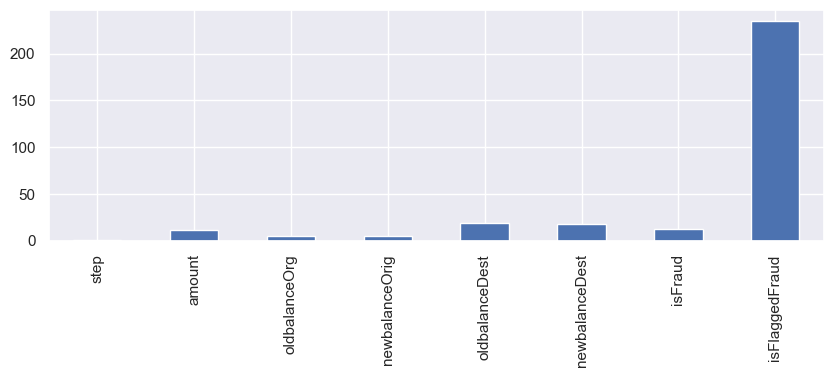

In [336]:
df.skew().plot(kind='bar')
print(df.skew())

In [337]:
print(df.columns)
df.dtypes

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<AxesSubplot:>

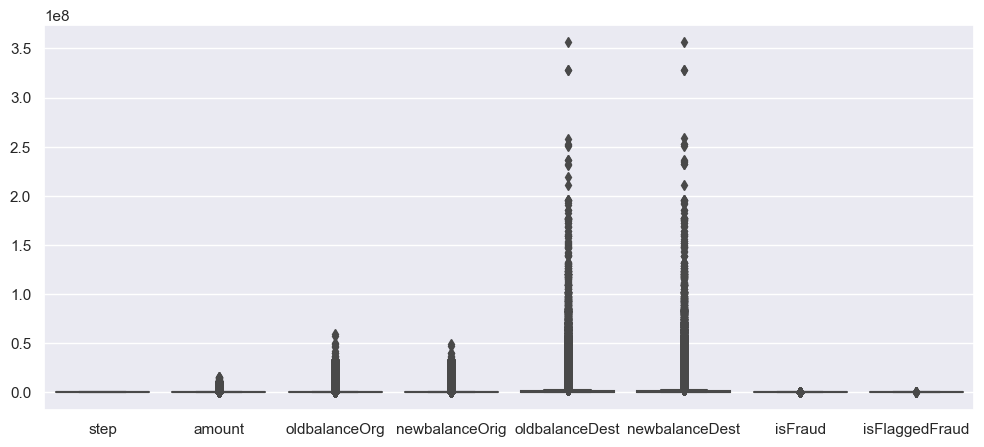

In [338]:
#Draw boxplot
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(data = df)

In [339]:
#convert categorical variable into numerical
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df['type'] = OE.fit_transform(df[['type']])

In [344]:
df = df.drop(['nameOrig','nameDest'], axis = 'columns')
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5700000,398,3.0,11049.92,172026.62,160976.70,0.00,0.00,0,0
5700001,398,1.0,293878.48,99129.00,0.00,73233.24,367111.73,0,0
5700002,398,1.0,128578.22,31124.00,0.00,380293.23,508871.45,0,0
5700003,398,0.0,280791.81,17022.00,297813.81,2689280.82,2408489.01,0,0
5700004,398,1.0,37678.62,297813.81,260135.20,77720.16,115398.78,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1.0,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4.0,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1.0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4.0,850002.52,850002.52,0.00,0.00,0.00,1,0


In [345]:
a = df.drop(['isFraud'], axis = 'columns')
b = df['isFraud']

In [348]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
a = SS.fit_transform(a)

In [349]:
# Split the data into X and y
X = a  # Exclude the 'isFraud' column from input features
y = b  # Target variable

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(530096, 8)
(132524, 8)
(530096,)
(132524,)


In [351]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [354]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.9982965349672512
0.9982644653043977


In [353]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.9968722646464037
0.9968760375479159


In [355]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 30}


In [356]:
# Evaluate the model with the best hyperparameters on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9987926715161027


In [358]:
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test,y_pred, average = 'macro'))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy_score: 0.9987926715161027
f1_score: 0.9392736918359352


array([[131782,      6],
       [   154,    582]], dtype=int64)

In [359]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131788
           1       0.99      0.79      0.88       736

    accuracy                           1.00    132524
   macro avg       0.99      0.90      0.94    132524
weighted avg       1.00      1.00      1.00    132524



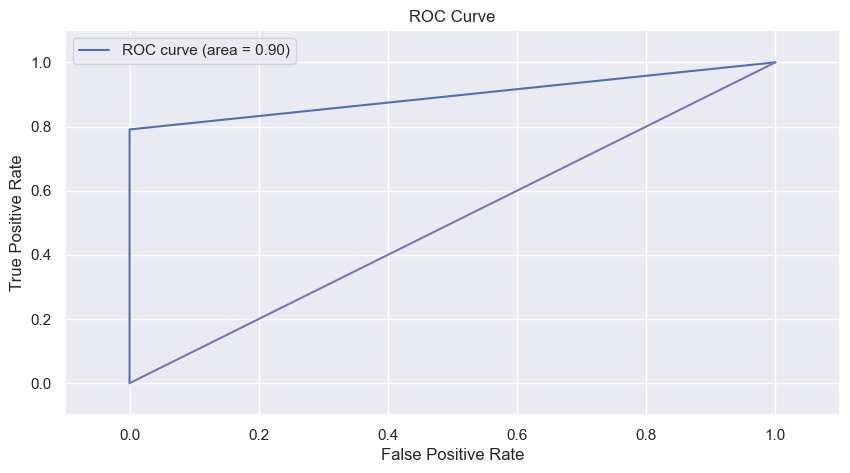

In [360]:
sns.set(rc={'figure.figsize':(10,5)})

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

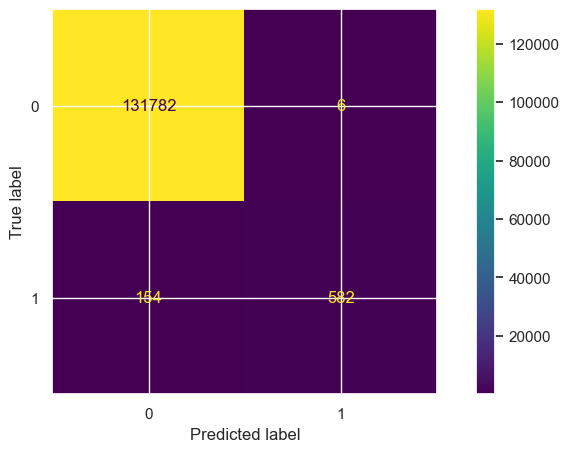

In [361]:
plot_confusion_matrix(best_model, X_test, y_test);

### 1. Data cleaning including missing values, outliers and multi-collinearity.

Data cleaning is an essential step in preparing the data for analysis and modeling. It involves handling missing values, outliers, and addressing multi-collinearity. Let's discuss each of these aspects in detail:

1. Handling Missing Values:
   - Identify the columns with missing values and assess the extent of missingness.
   - Some common approaches include:
     - Removing rows or columns with a high percentage of missing values if they are not critical for the analysis.
     - Imputing missing values using techniques like mean, median, mode.

2. Dealing with Outliers:
   - Identify outliers in the data, which are extreme values that deviate significantly from the majority of the data points.
   - Some approaches to handle outliers include:

3. Addressing Multi-collinearity:
   - Multi-collinearity refers to high correlation or dependency between predictor variables in a regression or machine learning model.
   - To address multi-collinearity, consider the following approaches:
     - Removing one or more highly correlated variables if they carry redundant information.

Overall, data cleaning helps ensure the quality and reliability of the data used for analysis. It reduces biases, improves the accuracy of the models, and ensures the validity of the insights derived from the data.

### 2. Describe fraud detection model in elaboration.

The fraud detection model is designed to identify and classify fraudulent transactions within a financial company's dataset. It uses machine learning techniques to learn patterns and anomalies associated with fraudulent behavior and makes predictions on new transactions to determine their likelihood of being fraudulent. Here's an elaboration on the fraud detection model:

1. Data Preprocessing:
   - The model starts by preprocessing the data, which includes steps like data cleaning, handling missing values, and feature engineering.
   - Feature engineering involves creating new variables or transforming existing variables to capture relevant information for fraud detection.

2. Feature Selection:
   - The model selects the most relevant features from the dataset to use for training.
   - Feature selection can be done through techniques such as correlation analysis, feature importance ranking, or dimensionality reduction methods.
   - The selected features should have a strong association with fraudulent behavior and help the model distinguish between fraudulent and legitimate transactions.

3. Model Training:
   - Various machine learning algorithms can be used to train the fraud detection model, such as logistic regression, decision trees.
   - The model is trained using a labeled dataset, where transactions are labeled as fraudulent or non-fraudulent.
   - During training, the model learns the patterns and characteristics of fraudulent transactions from the labeled data.

4. Model Evaluation:
   - The trained model is evaluated using evaluation metrics such as accuracy, precision, recall, F1 score, and AUC-ROC.
   - Cross-validation techniques are employed to assess the model's performance and validate its generalizability.
   - The model's performance is compared against baseline models or industry standards to determine its effectiveness in detecting fraud.

5. Prediction and Classification:
   - Once the model is trained and evaluated, it is ready to make predictions on new, unseen transactions.
   - The model assigns a probability or score to each transaction, indicating the likelihood of it being fraudulent.
   - A threshold is set to classify transactions as fraudulent or non-fraudulent based on the assigned probabilities or scores.

6. Model Iteration and Improvement:
   - The fraud detection model is an iterative process, and continuous monitoring and improvement are crucial.
   - The model's performance is regularly assessed, and adjustments are made as new fraudulent patterns emerge or as the dataset evolves.
   - Feedback from fraud analysts, domain experts, or stakeholders is incorporated to refine the model and enhance its accuracy and effectiveness.

The fraud detection model aims to minimize false positives (flagging legitimate transactions as fraudulent) and false negatives (failing to identify actual fraudulent transactions). It leverages machine learning algorithms and techniques to analyze transactional patterns and detect anomalies that indicate fraudulent behavior. The model's performance and accuracy are critical for effective fraud prevention and mitigating financial risks for the company.

### 3. Select variables to be included in the model.

1. Domain Knowledge: 
   - Start by consulting domain experts, fraud analysts, or stakeholders who possess expertise in the specific industry or domain.
   - Gather insights on the potential indicators of fraudulent activity and the variables that are likely to be associated with fraudulent behavior.
   - Domain knowledge plays a vital role in understanding the business context and identifying the relevant variables to include in the model.

2. Exploratory Data Analysis (EDA):
   - Perform exploratory data analysis to gain insights into the dataset and the relationships between variables.
   - Visualize the data, calculate summary statistics, and identify patterns or trends that may indicate fraudulent behavior.
   - Look for variables that show significant differences between fraudulent and non-fraudulent transactions.
   - Consider variables related to transaction attributes, customer information, time-based features, or any other relevant factors that may impact fraud.

3. Feature Importance Techniques:
   - Utilize feature importance techniques to identify variables that have the most predictive power in distinguishing fraudulent transactions.
   - Select the top-ranked features that contribute the most to the model's predictive performance.

4. Correlation Analysis:
   - Analyze the correlation between variables to identify any redundant or highly correlated features.
   - Highly correlated variables may introduce multi-collinearity and can impact the model's performance.

5. Iterative Feature Selection:
   - Use iterative feature selection methods to systematically evaluate subsets of variables and assess their impact on the model's performance.
   - Techniques like forward selection, backward elimination, or recursive feature elimination can help identify the optimal subset of variables.
   - Evaluate the model's performance with different feature combinations and select the set of variables that achieve the best balance between accuracy and simplicity.

6. Iterative Model Evaluation:
   - As the model training progresses, continuously evaluate the performance of the model using validation or testing datasets.
   - Monitor the impact of different variables on the model's metrics (e.g., accuracy, precision, recall) and make adjustments if necessary.
   - Incorporate feedback from fraud analysts or domain experts to refine the variable selection and improve the model's effectiveness.

The process of variable selection is iterative and involves a combination of domain knowledge, data exploration, and statistical techniques. It is crucial to strike a balance between including enough relevant variables to capture fraud patterns and avoiding overfitting or including irrelevant variables that may introduce noise into the model.

### 4. Demonstrate the performance of the model by using best set of tools.

1. Confusion Matrix: 
   - A confusion matrix provides a tabular summary of the model's predictions compared to the actual labels.
   - It helps evaluate the model's performance by calculating metrics such as accuracy, precision, recall, and F1 score.
   - The confusion matrix allows us to assess the true positives, true negatives, false positives, and false negatives.

2. ROC Curve and AUC-ROC:
   - The ROC (Receiver Operating Characteristic) curve is a graphical representation of the model's performance at various classification thresholds.
   - It plots the true positive rate (sensitivity) against the false positive rate (1-specificity).
   - The Area Under the ROC Curve (AUC-ROC) is a metric that quantifies the overall performance of the model, with a higher AUC indicating better performance.
   - AUC-ROC helps assess the model's ability to discriminate between fraudulent and non-fraudulent transactions.

3. Precision-Recall Curve:
   - The precision-recall curve illustrates the trade-off between precision (positive predictive value) and recall (sensitivity) at different classification thresholds.
   - It provides insights into the model's performance in identifying true positives while minimizing false positives.
   - The area under the precision-recall curve (AUC-PR) is another metric that measures the overall performance of the model.

4. Cross-Validation:
   - Cross-validation is a technique to assess the model's performance by splitting the data into multiple subsets.
   - It helps estimate the model's performance on unseen data and evaluates its generalizability.
   - Techniques like k-fold cross-validation or stratified cross-validation can be used to validate the model's performance across different subsets of the data.

5. Model Evaluation Metrics:
   - Besides accuracy, precision, recall, F1 score, AUC-ROC, and AUC-PR, other evaluation metrics like specificity, false positive rate, or negative predictive value can provide a comprehensive understanding of the model's performance.
   - It is important to consider these metrics in the context of the specific requirements and goals of the fraud detection task.

6. Visualizations:
   - Visualizations can be powerful tools to showcase the model's performance and interpretability.
   - Plots such as bar charts, histograms, or line graphs can illustrate the distribution of predicted probabilities, feature importance rankings, or comparison of performance across different models or techniques.

The choice of tools depends on the specific requirements, dataset, and the preferences of the stakeholders. It is recommended to use a combination of these tools to provide a comprehensive evaluation of the model's performance, showcasing its strengths and limitations in detecting fraudulent transactions.

### 5. Key factors that predict fraudulent customer.

1. Transaction Amount:
   - Fraudulent transactions may involve unusually large or small amounts of money compared to legitimate transactions.
   - High-value transactions may indicate attempts to transfer funds to another account before cashing out.
   - Low-value transactions may be used to test stolen credit cards or validate account details.

2. Transaction Frequency and Velocity:
   - Fraudsters often perform a high volume of transactions within a short period to exploit vulnerabilities or evade detection.
   - Unusual transaction frequency, rapid succession of transactions, or sudden spikes in activity can be indicators of fraudulent behavior.

3. Customer Behavior Deviation:
   - Fraudulent customers may exhibit deviations from their typical transaction behavior.
   - Changes in transaction patterns, such as different transaction types, unusual timing, or unfamiliar beneficiary accounts, can signal fraudulent activity.

4. Device and Browser Information:
   - Fraudsters may use multiple devices or browsers to carry out fraudulent transactions.
   - Inconsistent device information, multiple account logins from different devices, or the use of virtual machines can be red flags.

5. Machine Learning Models:
   - Utilizing machine learning models can automatically identify and weigh the importance of various features in predicting fraudulent customers.
   - Advanced techniques like anomaly detection, clustering, or ensemble models can capture complex patterns and identify key predictive factors.

It's important to note that the key factors for predicting fraudulent customers can evolve over time as fraudsters adapt their strategies. Therefore, a proactive approach that combines domain knowledge, data exploration, and advanced analytical techniques is crucial for staying ahead of emerging fraud trends and continuously improving the fraud detection models.

### 6. Factors which make sense.

The factors mentioned for predicting fraudulent customers generally make sense in the context of fraud detection. Here's an explanation of why these factors are relevant:

1. Transaction Amount: Unusual transaction amounts can indicate fraudulent behavior as fraudsters often try to exploit the system by transferring large sums or making small test transactions.

2. Transaction Frequency and Velocity: Fraudsters may perform a high volume of transactions within a short time frame to quickly exploit vulnerabilities or evade detection. Unusual transaction frequency or rapid succession of transactions can be a red flag.

3. Customer Behavior Deviation: Fraudulent customers often deviate from their normal transaction patterns. Changes in transaction types, timing, or beneficiary accounts can be indicators of fraudulent activity.

4. IP Address and Geolocation: Analyzing the IP address and geolocation associated with transactions helps identify potential fraud. Transactions from high-risk regions or known fraudulent IP addresses raise suspicion.

5. Device and Browser Information: Inconsistent device information, multiple logins from different devices, or the use of virtual machines can be signs of fraudulent activity.

6. Account Age and History: Newly created accounts or accounts with limited transaction history may be more susceptible to fraud. Analyzing account age and historical transaction patterns helps identify suspicious behavior.

7. Social Network Analysis: Fraudsters often operate in networks or collaborate with others. Analyzing relationships between accounts can uncover patterns of fraudulent behavior.

8. Machine Learning Models: Machine learning models can automatically identify and weigh the importance of different features in predicting fraud. They can capture complex patterns and adapt to evolving fraud trends.

While these factors make sense in general, it's important to note that fraudsters constantly adapt their strategies to evade detection. Therefore, it's crucial to continuously update and refine the fraud detection models and incorporate new features or techniques as fraud patterns evolve. Additionally, it's important to consider that each dataset and business context may have unique factors that are specific to their industry or customer behavior, which should also be taken into account when building a fraud detection model.

### 7. Kind of prevention should be adopted while company update its infrastructure.

1. Robust Authentication and Authorization:
   - Implement multi-factor authentication (MFA) to ensure stronger user authentication.
   - Utilize biometric authentication methods, such as fingerprint or facial recognition, for added security.
   - Enhance authorization mechanisms to restrict access privileges and enforce strict user permissions.

2. Real-time Monitoring and Alerting:
   - Deploy advanced monitoring systems to detect suspicious activities and anomalies in real-time.
   - Set up alerts and notifications for potential fraudulent transactions or unauthorized access attempts.
   - Implement intelligent systems that can detect patterns indicative of fraudulent behavior, such as unexpected changes in transaction patterns or deviations from normal user behavior.

3. Machine Learning and AI-Based Fraud Detection:
   - Utilize machine learning and AI algorithms to develop predictive models that can identify and flag potentially fraudulent transactions.
   - Train the models using historical fraud data and continuously update them with new fraud patterns and trends.
   - Implement anomaly detection techniques to identify unusual or abnormal behavior in real-time.

4. Data Encryption and Secure Storage:
   - Encrypt sensitive customer data both during transmission and at rest to prevent unauthorized access.
   - Implement secure storage mechanisms, such as encrypted databases or secure cloud storage, to protect customer information.
   - Regularly update encryption protocols and algorithms to stay ahead of potential security vulnerabilities.

5. Employee Training and Awareness:
   - Conduct regular training sessions to educate employees about fraud prevention techniques and best practices.
   - Promote a culture of security awareness and vigilance among employees, encouraging them to report any suspicious activities or potential security threats.
   - Establish clear guidelines and protocols for handling sensitive customer information and emphasize the importance of data protection.

6. Collaboration and Information Sharing:
   - Foster collaborations with industry partners, regulatory bodies, and law enforcement agencies to share information and stay updated on the latest fraud trends and prevention strategies.
   - Participate in industry-wide initiatives or consortiums that focus on sharing fraud intelligence and best practices.

7. Regular Security Audits and Penetration Testing:
   - Conduct periodic security audits and vulnerability assessments to identify potential weaknesses in the infrastructure.
   - Perform penetration testing to simulate real-world attacks and identify any vulnerabilities that could be exploited by fraudsters.
   - Regularly update and patch systems to address any identified vulnerabilities.

By adopting these preventive measures, the financial company can strengthen its infrastructure and significantly reduce the risk of fraudulent activities. However, it's important to note that fraud prevention is an ongoing process, and the company should continuously monitor and adapt its strategies to stay ahead of evolving fraud tactics.

### 8. These actions have been implemented.

To determine if the implemented actions for fraud prevention are effective, you can employ the following evaluation methods:

1. Performance Metrics: Monitor and analyze key performance metrics related to fraud detection and prevention. These metrics may include:
   - False Positive Rate: Measure the rate at which legitimate transactions are incorrectly flagged as fraudulent.
   - False Negative Rate: Measure the rate at which fraudulent transactions go undetected.
   - Precision: Calculate the proportion of correctly identified fraudulent transactions out of all transactions flagged as fraudulent.
   - Recall or True Positive Rate: Measure the proportion of actual fraudulent transactions correctly identified by the system.
   - F1 Score: Consider the balance between precision and recall, providing a single metric to evaluate the model's performance.
   - AUC-ROC: Evaluate the model's ability to distinguish between fraudulent and non-fraudulent transactions across various thresholds.

2. Comparative Analysis: Compare the performance of the fraud prevention measures before and after their implementation. This can be done by evaluating historical data or conducting controlled experiments. Assess whether there is a noticeable improvement in fraud detection rates, reduction in false positives, or increased accuracy compared to previous periods or baseline models.

3. Case Studies and Investigations: Examine specific cases of detected fraudulent transactions and investigate whether the implemented measures successfully identified and prevented them. Analyze the details of the flagged transactions, including the factors that triggered the detection, the actions taken, and the outcomes. This qualitative analysis can provide insights into the effectiveness of the prevention measures.

4. Feedback and Reporting: Establish a feedback mechanism where users, customers, or employees can report suspicious activities or provide feedback on the system's performance. Regularly review and analyze this feedback to identify any potential gaps or areas for improvement.

6. Continuous Monitoring and Adaptation: Implement a continuous monitoring system to track the performance of the fraud prevention measures over time. Regularly review and update the prevention strategies based on emerging fraud patterns, industry trends, and feedback from stakeholders.